In [2]:
from prf_api.prf_api import PRFApi

import pandas as pd
import numpy as np

## Getting the data

In [3]:
data = PRFApi()

In [4]:
infracoes_df = data.dataframe('infracoes', estado='RN', anos=list(range(2007, 2019)),
                              caminho='../data/raw')

>>> Criando dataframe com ano 2007...
>>> Criando dataframe com ano 2008...
>>> Criando dataframe com ano 2009...
>>> Criando dataframe com ano 2010...
>>> Criando dataframe com ano 2011...
>>> Criando dataframe com ano 2012...
>>> Criando dataframe com ano 2013...
>>> Criando dataframe com ano 2014...
>>> Criando dataframe com ano 2015...


/home/mayra/workspace/corvusenv/lib/python3.6/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


>>> Criando dataframe com ano 2016...


/home/mayra/workspace/corvusenv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3249: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


>>> Criando dataframe com ano 2017...
>>> Criando dataframe com ano 2018...


/home/mayra/workspace/corvusenv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3249: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


### Analyzing o dataset

In this section, superficial observation are made over the dataset, searching for improvement points and inconsistencies.

In [5]:
infracoes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641908 entries, 0 to 641907
Data columns (total 22 columns):
cod_infracao               141782 non-null float64
dat_infracao               641908 non-null object
data_fim_vigencia          486313 non-null object
data_inicio_vigencia       641908 non-null object
descricao_abreviada        641908 non-null object
enquadramento              641908 non-null object
especie                    626005 non-null object
exc_verificado             273502 non-null float64
hora                       280798 non-null object
ind_assinou_auto           129681 non-null object
ind_sentido_trafego        513466 non-null object
ind_veiculo_estrangeiro    641908 non-null object
med_considerada            282002 non-null float64
med_realizada              282003 non-null float64
nom_modelo_veiculo         603485 non-null object
nom_municipio              641907 non-null object
nome_veiculo_marca         513460 non-null object
num_br_infracao            641908 n

Notes:

- The field `dat_infracao`, `data_inicio_vigencia` e `data_fim_vigencia` must be datetime;
- Important columns such as `hora`, `uf_infracao`, `cod_infracao`,  `tip_abordagem`, etc, present few missing data (which is nice)
- `ind_assinou_auto`, `uf_placa`, `ind_sentido_trafego`, `especie` could contain relevant information, but there are a relevant amount of a missing data
- `hora` should be timestamp

In [6]:
infracoes_df.describe()

,cod_infracao,exc_verificado,med_considerada,med_realizada,num_br_infracao,num_km_infracao
count,141782.000000,273502.000000,2.820020e+05,2.820030e+05,641908.000000,641908.000000
mean,64196.989688,73.902882,5.644966e+02,5.740050e+02,245.313684,115.780006
std,8695.124776,1797.338828,7.598502e+03,8.095999e+03,116.999887,78.430009
min,50100.000000,-11000.000000,-3.000000e-02,0.000000e+00,0.000000,0.000000
25%,57970.000000,0.000000,0.000000e+00,0.000000e+00,101.000000,66.000000
50%,66102.000000,0.000000,2.750000e-01,3.200000e-01,304.000000,102.000000
75%,72422.000000,8.000000,8.900000e+01,9.600000e+01,304.000000,146.000000
max,76332.000000,815910.000000,3.065910e+06,3.065910e+06,427.000000,3205.000000


The only field containg weird data id `num_br_infracao`, since the higher road number possible is 610 and the lower is 010, but the numbers found in the dataset are between 101 and 427.

In [7]:
infracoes_df.head()

,cod_infracao,dat_infracao,data_fim_vigencia,data_inicio_vigencia,descricao_abreviada,enquadramento,especie,exc_verificado,hora,ind_assinou_auto,...,med_considerada,med_realizada,nom_modelo_veiculo,nom_municipio,nome_veiculo_marca,num_br_infracao,num_km_infracao,tip_abordagem,uf_infracao,uf_placa
0,NaN,2007-09-01,2014-10-31,2000-01-01,Ultrapassar pela contramÃ£o linha de divisÃ£o ...,203 V,TRAÃÃO,NaN,NaN,NaN,...,NaN,NaN,NaN,RIACHUELO,VOLVO,304.0,230,S,RN,PB
1,NaN,2007-09-01,2016-10-31,2000-01-01,"Deixar de indicar c/ antec, med gesto de braÃ§...",196,CARGA,NaN,NaN,S,...,NaN,NaN,NaN,PARNAMIRIM,FORD,101.0,100,C,RN,PB
2,NaN,2007-09-01,2016-02-01,2000-01-01,"Conduzir motocicleta, motoneta e ciclomotor se...",244 I,PASSAGEIRO,NaN,NaN,NaN,...,NaN,NaN,NaN,SERRA CAIADA,HONDA,226.0,69,S,RN,RN
3,NaN,2007-09-01,2016-10-31,2000-01-01,"Conduzir motocicleta, motoneta e ciclomotor tr...",244 II,PASSAGEIRO,NaN,NaN,NaN,...,NaN,NaN,NaN,SERRA CAIADA,HONDA,226.0,69,S,RN,RN
4,NaN,2007-09-01,2012-12-20,2000-01-01,Dirigir sob a influÃªncia de Ã¡lcool,165,MISTO,0.57,NaN,S,...,0.86,0.94,NaN,MOSSORO,FORD,304.0,35,C,RN,RN


In [8]:
infracoes_df.query('nom_municipio == "PARELHAS" ')

,cod_infracao,dat_infracao,data_fim_vigencia,data_inicio_vigencia,descricao_abreviada,enquadramento,especie,exc_verificado,hora,ind_assinou_auto,...,med_considerada,med_realizada,nom_modelo_veiculo,nom_municipio,nome_veiculo_marca,num_br_infracao,num_km_infracao,tip_abordagem,uf_infracao,uf_placa
3589,NaN,2007-10-19,2016-10-31,2000-01-01,Parar na pista de rolamento das rodovias,182-V,PASSAGEIRO,NaN,NaN,NaN,...,NaN,NaN,NaN,PARELHAS,GM,101.0,105,S,RN,RN
3590,NaN,2007-10-19,2016-10-31,2000-01-01,Executar operaÃ§Ã£o de retorno em locais proib...,206 I,PASSAGEIRO,NaN,NaN,NaN,...,NaN,NaN,NaN,PARELHAS,VW,101.0,105,S,RN,RN
3591,NaN,2007-10-19,2016-10-31,2000-01-01,Executar operaÃ§Ã£o de retorno em locais proib...,206 I,PASSAGEIRO,NaN,NaN,NaN,...,NaN,NaN,NaN,PARELHAS,FIAT,101.0,105,S,RN,RN
19335,NaN,2007-03-16,2016-10-31,2000-01-01,Conduzir veÃ­culo sem os documentos de porte o...,232,PASSAGEIRO,NaN,NaN,S,...,NaN,NaN,NaN,PARELHAS,HONDA,304.0,307,C,RN,RN
22199,NaN,2007-04-16,2016-10-31,2000-01-01,Deixar de dar passagem pela esquerda quando so...,198,PASSAGEIRO,NaN,NaN,S,...,NaN,NaN,NaN,PARELHAS,HONDA,101.0,105,C,RN,RN
26229,NaN,2007-01-26,2016-10-31,2000-01-01,Conduzir o veÃ­culo transportando passageiros ...,230 II,CARGA,NaN,NaN,S,...,NaN,NaN,NaN,PARELHAS,FORD,101.0,108,C,RN,PE
46792,NaN,2008-05-12,2012-12-31,2000-01-01,"NÃ£o lanÃ§ar no documento fiscal, as informaÃ§...",46 I c,CARGA,NaN,NaN,S,...,NaN,NaN,23.220,PARELHAS,VW,101.0,105,C,RN,PE
68681,NaN,2009-09-08,2016-10-31,2000-01-01,Conduzir o veÃ­culo c/ equip do sistema de ilu...,230 XIII,CARGA,NaN,NaN,S,...,NaN,NaN,I/TOYOTA HILUX C,PARELHAS,TOYOTA,101.0,101,C,RN,RN
82938,NaN,2009-12-28,2016-10-31,2000-01-01,Conduzir o veÃ­culo com qualquer uma das placa...,230 VI,PASSAGEIRO,NaN,NaN,S,...,NaN,NaN,GM/ZAFIRA COMFOR,PARELHAS,GM,304.0,305,C,RN,RN
508596,50100.0,2017-11-24,NaN,2016-11-01,Dirigir veículo sem possuir CNH/PPD/ACC,162 I,PASSAGEIRO,0.0,15:32:00,NaN,...,0.0,0.0,CG 150 TITAN EX,PARELHAS,HONDA,427.0,38,C,RN,RN


## Treating the data

The cleaning consists in correcting the notes made previously.


In [9]:
# Converte campos de data
infracoes_df.dat_infracao = pd.to_datetime(infracoes_df.dat_infracao,
                                           format='%Y-%m-%d')
infracoes_df.data_fim_vigencia = pd.to_datetime(infracoes_df.data_fim_vigencia,
                                                format='%Y-%m-%d')
infracoes_df.data_inicio_vigencia = pd.to_datetime(infracoes_df.data_inicio_vigencia,
                                                   format='%Y-%m-%d')


In [10]:
infracoes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641908 entries, 0 to 641907
Data columns (total 22 columns):
cod_infracao               141782 non-null float64
dat_infracao               641908 non-null datetime64[ns]
data_fim_vigencia          486313 non-null datetime64[ns]
data_inicio_vigencia       641908 non-null datetime64[ns]
descricao_abreviada        641908 non-null object
enquadramento              641908 non-null object
especie                    626005 non-null object
exc_verificado             273502 non-null float64
hora                       280798 non-null object
ind_assinou_auto           129681 non-null object
ind_sentido_trafego        513466 non-null object
ind_veiculo_estrangeiro    641908 non-null object
med_considerada            282002 non-null float64
med_realizada              282003 non-null float64
nom_modelo_veiculo         603485 non-null object
nom_municipio              641907 non-null object
nome_veiculo_marca         513460 non-null object
num_br_infr

In [11]:
# Testa a conversão para datas
infracoes_df.dat_infracao.dt.weekday_name.head()

0    Saturday
1    Saturday
2    Saturday
3    Saturday
4    Saturday
Name: dat_infracao, dtype: object

Para lidar com os dados faltantes, serão removidos apenas as linhas que não possuem informação em algum dos atributos que foram tidos como os mais relevantes.

In [12]:
# Remove linhas
infracoes_df.dropna(axis=0, subset=['hora', 'ind_sentido_trafego', 'uf_placa', 
                                    'nom_modelo_veiculo'], how='any', inplace=True)

# Visualiza novo tamanho do dataset
infracoes_df.shape

(212843, 22)

Outro tratamento importante é categorizar o horário do dia. Dividiremos em:
- Manhã
- Tarde
- Noite
- Madrugada

In [13]:
def categoriza_horario(row):
  hora = row['hora']
  if hora >= '05:00' and hora < '12:00':
    return 'MANHÃ'
  elif hora >= '12:00' and hora < '17:59':
    return 'TARDE'
  elif hora >= '18:00' and hora < '23:59':
    return 'NOITE'
  else:
    return 'MADRUGADA'

infracoes_df['horario'] = infracoes_df.apply(categoriza_horario, axis=1)

In [14]:
infracoes_df.query("enquadramento == ''")

,cod_infracao,dat_infracao,data_fim_vigencia,data_inicio_vigencia,descricao_abreviada,enquadramento,especie,exc_verificado,hora,ind_assinou_auto,...,med_realizada,nom_modelo_veiculo,nom_municipio,nome_veiculo_marca,num_br_infracao,num_km_infracao,tip_abordagem,uf_infracao,uf_placa,horario


In [15]:
# save the data 
infracoes_df.to_csv('../data/processed/violations.csv', sep=';')

## Exploring

This section brings a visual analysis, guided by some questions:
 - In which week days the most infractions occur? And in which hour of the day?
 - Which are the most common violations?
 - How many violations are committed in infrações feitas em estados diferentes dos da placa?
 - Em feriados são mais frequentes?

In [16]:
# Importando bibliotecas
import seaborn as sns

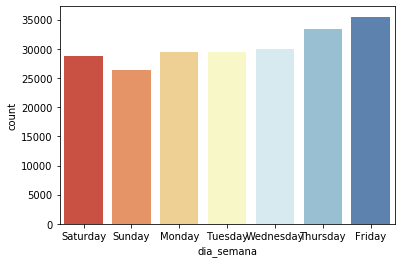

In [17]:
infracoes_df['dia_semana'] = infracoes_df.dat_infracao.dt.weekday_name
sns.countplot(x='dia_semana', data=infracoes_df, palette='RdYlBu')

Answering the first questions, the days when the most violations are committed are friday and thurday. On the other hand, sunday is when less violations occur.

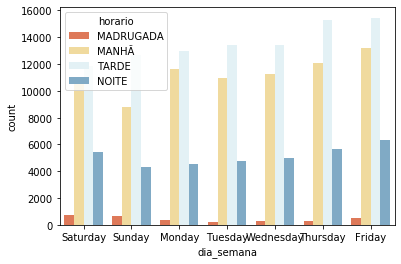

In [18]:
sns.countplot(x='dia_semana', hue='horario', data=infracoes_df, palette='RdYlBu')

Every week day, most violations ocurr during the afternoon and the morning, respectively. Between midnight and early dawn, a driving violation is more rare.

In [19]:
# Recupera as 5 infracoes mais comuns
most_common_violations = infracoes_df.enquadramento.value_counts(normalize=True).head()

most_common_violations

250 I b    0.104744
162 I      0.092730
230 * V    0.084259
203 V      0.073947
167        0.051503
Name: enquadramento, dtype: float64

In [20]:
for violation in most_common_violations.index:
  description = infracoes_df.query("enquadramento == '" + violation+ "'").tail(1).descricao_abreviada.values
  print(description)

['Em movimento de dia, deixar de manter acesa luz baixa nas rodovias.']
['Dirigir veículo sem possuir CNH/PPD/ACC']
['Conduzir o veículo registrado que não esteja devidamente licenciado']
['Ultrapassar pela contramão linha de divisão de fluxos opostos, contínua amarela']
['Deixar o passageiro de usar o cinto segurança']


The most common violation commited between 2007 and 2018 is the one in which the driver don't keep the lights on in the road during the day, which could be explained by the fact that is a somewhat new restriction and easily to forget.

The second and third place are more severe and dangerous, since either the driver isn't qualified or the vehicle is irregular. Therefore, considering that this situations happen in a national road, people in all country could be in danger.

The fourth place is also a serious violation, that presents a risk for everyone on the roads.